In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

### Cargar los datos y representarlos separando los aprobados de los no aprobados

Text(0, 0.5, 'Mark 2')

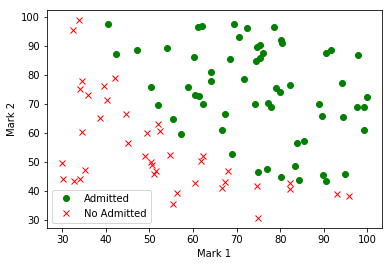

In [101]:
dataset = pd.read_csv('marks.txt',sep = ",", header=None)

dataset.columns = ['Mark_1','Mark_2','Admitted']

pass_student = dataset[dataset['Admitted'] == 1]
no_pass_student = dataset[dataset['Admitted'] == 0]

plt.plot(pass_student['Mark_1'], pass_student['Mark_2'], 'o', color='green', label = "Admitted")
plt.plot(no_pass_student['Mark_1'], no_pass_student['Mark_2'], 'x', color='red', label = "No Admitted")
plt.legend(loc="lower left")
plt.xlabel("Mark 1")
plt.ylabel("Mark 2")



### Dividir el conjunto de datos en entrenamiento-test y normalizarlos

In [102]:
def train_test_split(x_data, y_data):
    idx_train = np.random.choice(len(x_data), round(len(x_data)*0.8), replace = False)
    idx_test = list(set(range(len(x_data))) - set(idx_train))
    
    x_train = x_data[idx_train,:]
    x_test = x_data[idx_test,:]
    y_train = y_data[idx_train]
    y_test = y_data[idx_test]
    
    return x_train, x_test, y_train, y_test


X_data = dataset.values[:,0:2] # Variables independientes
Y_data = dataset.values[:,-1] # Variable dependiente (Aprobado/No aprobado)

min_max_scaler = MinMaxScaler()
x_data_norm = min_max_scaler.fit_transform(X_data)

x_train, x_test, y_train, y_test = train_test_split(x_data_norm, Y_data)


In [125]:
W = tf.Variable(tf.zeros([2,1]), dtype= tf.float32)
b = tf.Variable(tf.zeros([1,1]), dtype= tf.float32)
x_data = tf.placeholder(shape=[None,2], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype= tf.float32)

#modelo = X*W+b
model =tf.add(tf.matmul(x_data, W), b)

#Cálculo de la precisión
y_prediction = tf.round(tf.nn.sigmoid(model))
correct_prediction = tf.cast(tf.equal(y_prediction, y_target), dtype=tf.float32)
accuracy = tf.reduce_mean(correct_prediction)

# Función de pérdidas a minimizar.
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = model, labels = y_target)) 
  
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.09).minimize(loss) 
  
# Global Variables Initializer 
session= tf.Session()
init = tf.global_variables_initializer() 
session.run(init)



### Algoritmo de optimización

In [135]:
epochs = 1500
batch_size = 80

train_acc = []
test_acc = []
loss_trace = []

for it in range(epochs):
    idx = np.random.choice(len(x_train), batch_size, replace=False)
    
    x_vals_train = x_train[idx]
    y_vals_train = np.matrix(y_train[idx]).T #y_train[idx].reshape(batch_size,2)
    
    session.run(optimizer, feed_dict={x_data: x_vals_train, y_target: y_vals_train})
    temp_loss = session.run(loss, feed_dict={x_data: x_vals_train, y_target: y_vals_train})
    acc_train = session.run(accuracy, feed_dict={x_data: x_train, y_target:np.matrix(y_train).T})
    acc_test = session.run(accuracy, feed_dict={x_data: x_test, y_target:np.matrix(y_test).T})

    loss_trace.append(temp_loss)
    train_acc.append(acc_train)
    test_acc.append(acc_test)
    
    if (it+1)%100 == 0:
        print("Iteración #"+str(it)+" Precisión entrenamiento: "+ str(acc_train) +" Precisión test: "+ str(acc_test)
             +" Loss: "+ str(temp_loss))


Iteración #99 Precisión entrenamiento: 0.9 Precisión test: 0.95 Loss: 0.22403213
Iteración #199 Precisión entrenamiento: 0.9 Precisión test: 0.95 Loss: 0.22391033
Iteración #299 Precisión entrenamiento: 0.9 Precisión test: 0.95 Loss: 0.2237902
Iteración #399 Precisión entrenamiento: 0.9 Precisión test: 0.95 Loss: 0.22367167
Iteración #499 Precisión entrenamiento: 0.9 Precisión test: 0.95 Loss: 0.2235547
Iteración #599 Precisión entrenamiento: 0.9 Precisión test: 0.95 Loss: 0.2234393
Iteración #699 Precisión entrenamiento: 0.9 Precisión test: 0.95 Loss: 0.22332545
Iteración #799 Precisión entrenamiento: 0.9 Precisión test: 0.95 Loss: 0.22321308
Iteración #899 Precisión entrenamiento: 0.9 Precisión test: 0.95 Loss: 0.22310212
Iteración #999 Precisión entrenamiento: 0.9 Precisión test: 0.95 Loss: 0.22299266
Iteración #1099 Precisión entrenamiento: 0.9 Precisión test: 0.95 Loss: 0.22288465
Iteración #1199 Precisión entrenamiento: 0.9 Precisión test: 0.95 Loss: 0.22277796
Iteración #1299 Pr

### Visualización de la curva del error

Text(0, 0.5, 'Loss')

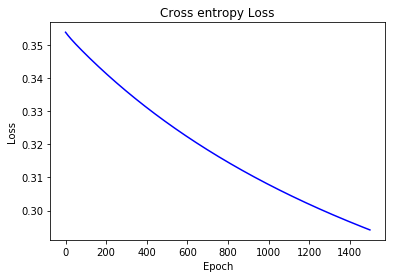

In [129]:
### Visualización de la evolución del error
plt.plot(range(epochs), loss_trace, label="Evolución del error", color='blue' )
plt.title("Cross entropy Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

### Evolución de la precisión promedio por epoch

Text(0, 0.5, 'Accuracy')

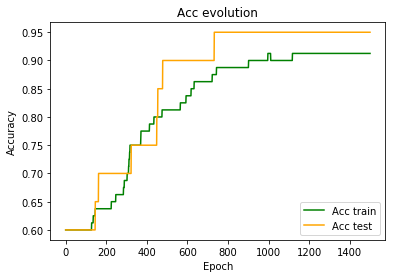

In [118]:
#Visualización de la evolución de la precisión del entrenamiento y del test
plt.plot(range(epochs), train_acc, label="Acc train", color="green")
plt.plot(range(epochs), test_acc, label="Acc test", color="orange")
plt.legend(loc="lower right")
plt.title("Acc evolution")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

### Decision boundary

In [119]:
Weights = np.squeeze(session.run(W))
Bias = np.squeeze(session.run(b))
# Calculating the Decision Boundary 
decision_boundary_x = np.array([np.min(X_data[:, 0]), 
                               np.max(X_data[:, 0])]) 

decision_boundary_y = (- 1.0 / Weights[0]) * (decision_boundary_x * Weights + Bias) 

decision_boundary_y = [decision_boundary_y[0], decision_boundary_y[1]] 

In [120]:
def norm(values):
    return (values-30.05882)/(98.86943-30.05882)


[0.0, 1.0]

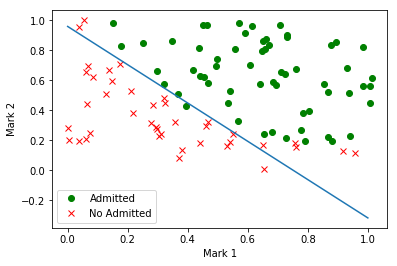

In [121]:
plt.plot(norm(pass_student['Mark_1']), norm(pass_student['Mark_2']), 'o', color='green', label = "Admitted")
plt.plot(norm(no_pass_student['Mark_1']), norm(no_pass_student['Mark_2']), 'x', color='red', label = "No Admitted")
plt.legend(loc="lower left")
plt.xlabel("Mark 1")
plt.ylabel("Mark 2")

minimun = np.min(x_data_norm[:, 0])
maximum = np.max(x_data_norm[:, 1])

x_values = [np.min(x_data_norm[:, 0] - 0), np.max(x_data_norm[:, 1] + 0)]
y_values = - (Bias + np.dot(Weights[0], x_values)) / Weights[1]

plt.plot(x_values, y_values) 
x_values

In [124]:
#Total accuracy experiment
total_acc = session.run(accuracy, feed_dict={x_data: all_x, y_target:np.matrix(all_y).T})
train_t_acc = session.run(accuracy, feed_dict={x_data: x_train, y_target:np.matrix(y_train).T})
test_t_acc = session.run(accuracy, feed_dict={x_data: x_test, y_target:np.matrix(y_test).T})
print(total_acc)
print(train_t_acc)
print(test_t_acc)

0.92
0.9125
0.95


In [163]:
#Trial de dato individual
x_val = np.array([60,70]).reshape(1,2)
x_val_norm = norm(x_val)
print(x_val_norm)
print(np.squeeze(session.run(y_prediction,feed_dict={x_data: x_val_norm})))

[[0.43512447 0.58045089]]
1.0
